![Add a relevant banner image here](path_to_image)

# Project Title

## Overview

Short project description. Your bottom line up front (BLUF) insights.

## Business Understanding

Text here

## Data Understanding

Text here

In [1]:
# Load relevant imports here
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import gc
import csv
from datetime import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint, reciprocal


In [2]:
df_all_data = pd.read_csv('Data/US_Accidents_March23.csv')
print(df_all_data.describe())
print(df_all_data.head())
print(df_all_data.columns)

           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e

In [3]:
df_severity_by_state = pd.crosstab(df_all_data['Severity'], df_all_data['State'])

totals = df_severity_by_state.sum()

for i in range(4):
    pct_row = (df_severity_by_state.iloc[i] / totals) * 100
    df_severity_by_state.loc[f'Row{i+1}_pct'] = pct_row

df_severity_by_state

State,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Severity,,,,,,,,,,,,,,,,,,,,,
1,681.000000,37.000000,7389.000000,1.028400e+04,970.000000,72.000000,143.000000,234.000000,7083.000000,1007.000000,...,0.000000,2335.000000,4233.000000,632.000000,3115.000000,3.000000,865.000000,90.000000,2.000000,0.000000
2,76993.000000,19239.000000,140553.000000,1.445833e+06,56105.000000,50392.000000,16489.000000,11596.000000,755895.000000,94206.000000,...,221.000000,133054.000000,450952.000000,79801.000000,230660.000000,616.000000,73339.000000,21530.000000,12444.000000,3028.000000
3,21542.000000,677.000000,17551.000000,2.718140e+05,26306.000000,16369.000000,1177.000000,715.000000,104065.000000,61245.000000,...,8.000000,28510.000000,120443.000000,15000.000000,51324.000000,217.000000,29926.000000,9606.000000,524.000000,182.000000
4,1828.000000,2827.000000,5116.000000,1.350200e+04,7504.000000,4172.000000,821.000000,1552.000000,13149.000000,12776.000000,...,60.000000,3489.000000,7209.000000,1646.000000,18202.000000,90.000000,4091.000000,3462.000000,823.000000,547.000000
Row1_pct,0.673964,0.162423,4.330956,5.905481e-01,1.067283,0.101401,0.767579,1.659928,0.804711,0.595034,...,0.000000,1.394963,0.726275,0.651016,1.027033,0.323974,0.799290,0.259456,0.014500,0.000000
Row2_pct,76.197498,84.455663,82.383110,8.302547e+01,61.731859,70.969650,88.507783,82.258637,85.878422,55.666119,...,76.470588,79.488374,77.371890,82.202124,76.049865,66.522678,67.767808,62.067574,90.219677,80.596220
Row3_pct,21.319425,2.971905,10.287265,1.560864e+01,28.944270,23.053306,6.317767,5.072001,11.822989,36.189536,...,2.768166,17.032284,20.664954,15.451333,16.921804,23.434125,27.652674,27.692574,3.799028,4.844291
Row4_pct,1.809113,12.410009,2.998669,7.753385e-01,8.256588,5.875643,4.406871,11.009435,1.493879,7.549310,...,20.761246,2.084379,1.236881,1.695526,6.001299,9.719222,3.780227,9.980397,5.966795,14.559489


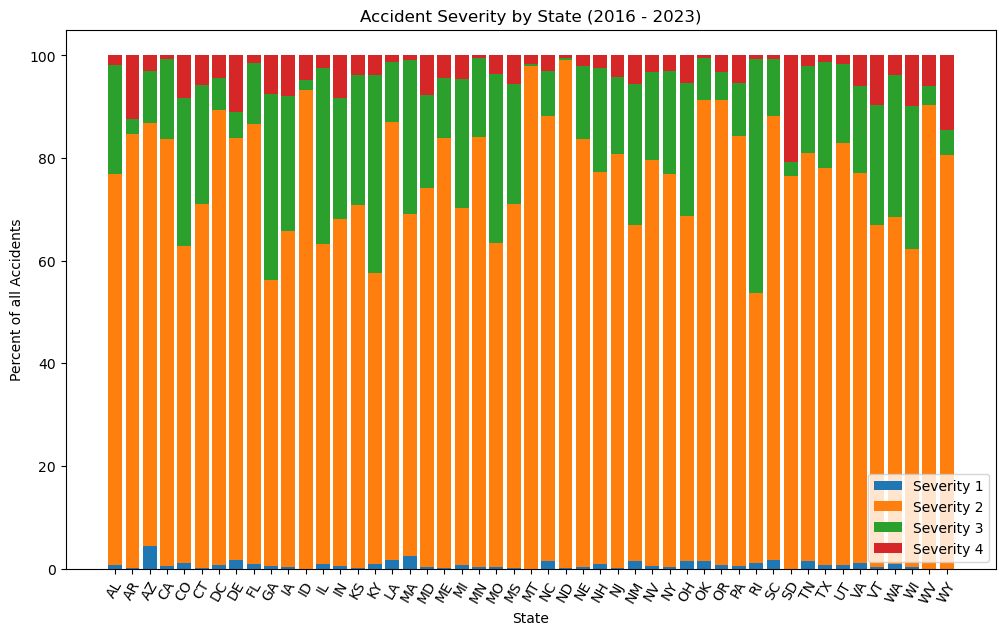

In [4]:
# chart of accident severity by state
states = df_severity_by_state.columns
sev1 = df_severity_by_state.iloc[4]
sev2 = df_severity_by_state.iloc[5]
sev3 = df_severity_by_state.iloc[6]
sev4 = df_severity_by_state.iloc[7]

plt.figure(figsize=(12, 7))
plt.bar(states, sev1)
plt.bar(states, sev2, bottom=sev1)
plt.bar(states, sev3, bottom=sev1+sev2)
plt.bar(states, sev4, bottom=sev1+sev2+sev3)
plt.xlabel("State")
plt.xticks(rotation=60)
plt.ylabel("Percent of all Accidents")
plt.legend(["Severity 1", "Severity 2", "Severity 3", "Severity 4"])
plt.title("Accident Severity by State (2016 - 2023)")
plt.show()

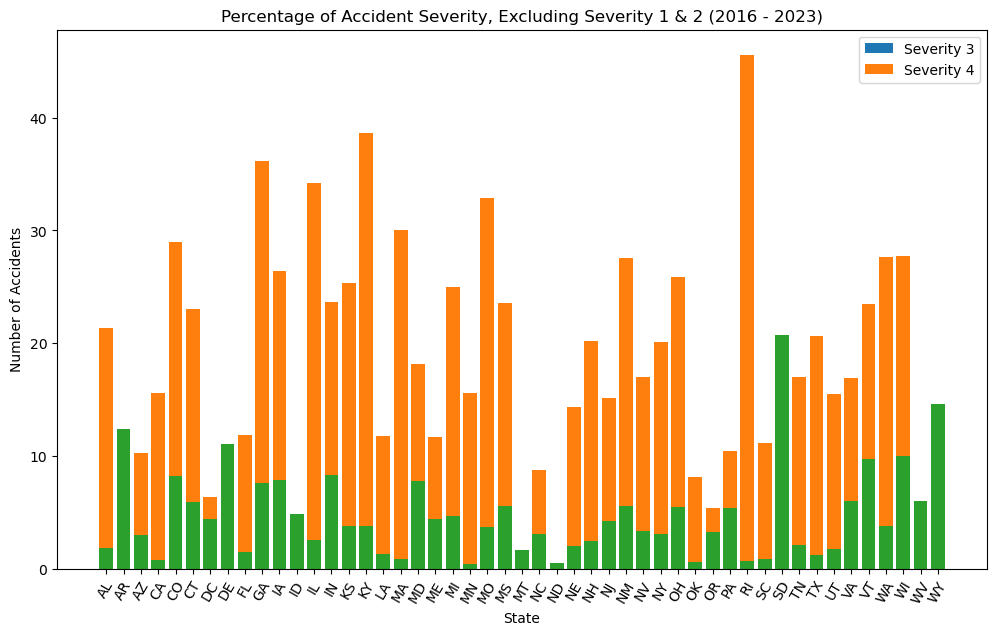

In [5]:
# chart of accident severity by state without sev1 and sev2 (sev 2 >> than the others so obscures sev 1, 3, 4 above)
states = df_severity_by_state.columns
sev3 = df_severity_by_state.iloc[6]
sev4 = df_severity_by_state.iloc[7]

plt.figure(figsize=(12, 7))
plt.bar(states, sev1)
plt.bar(states, sev3)
plt.bar(states, sev4)
plt.xlabel("State")
plt.xticks(rotation=60)
plt.ylabel("Number of Accidents")
plt.legend(["Severity 3", "Severity 4"])
plt.title("Percentage of Accident Severity, Excluding Severity 1 & 2 (2016 - 2023)")
plt.show()

In [6]:
df_sev_by_crossing = pd.crosstab(df_all_data['Severity'], df_all_data['Crossing'])
df_sev_by_crossing = df_sev_by_crossing.rename(columns={False: "No", True: "Yes"})

totals = df_sev_by_crossing.sum()

for i in range(4):
    pct_row1 = (df_sev_by_crossing.iloc[i] / totals) * 100
    df_sev_by_crossing.loc[f'Row{i+1}_pct'] = pct_row1


df_sev_by_crossing

Crossing,No,Yes
Severity,,
1,4.867500e+04,18691.000000
2,5.363435e+06,793546.000000
3,1.251305e+06,48032.000000
4,1.912160e+05,13494.000000
Row1_pct,7.101039e-01,2.139138
Row2_pct,7.824542e+01,90.819364
Row3_pct,1.825488e+01,5.497143
Row4_pct,2.789589e+00,1.544355


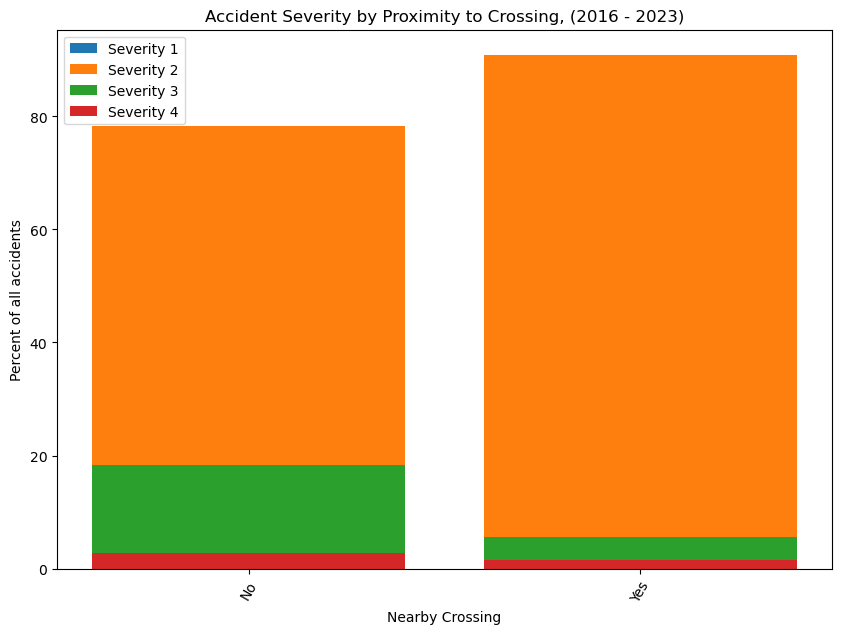

In [7]:
# charts of accident severity by bump, traffic calming, roundabout
# chart of accident severity by state
crossing = df_sev_by_crossing.columns
cr1 = df_sev_by_crossing.iloc[4]
cr2 = df_sev_by_crossing.iloc[5]
cr3 = df_sev_by_crossing.iloc[6]
cr4 = df_sev_by_crossing.iloc[7]

plt.figure(figsize=(10, 7))
plt.bar(crossing, cr1)
plt.bar(crossing, cr2)
plt.bar(crossing, cr3)
plt.bar(crossing, cr4)
plt.xticks(rotation=60)
plt.xlabel("Nearby Crossing")
plt.ylabel("Percent of all accidents")
plt.legend(["Severity 1", "Severity 2", "Severity 3", "Severity 4"])
plt.title("Accident Severity by Proximity to Crossing, (2016 - 2023)")
plt.show()

In [8]:
print(f"Count of Wind Direction Entries: {df_all_data['Wind_Direction'].nunique()}")

Count of Wind Direction Entries: 24


## Data Preparation

### Data Selection

Based on my exploration of the data, I'm dropping the following fields from the dataset for the following reasons:

- Source: contains information that has no relationship to causes and effects of accidents
- Start_Lat, Start_Lng, End_Lat, End_Lng, Street, City, County, State, Zipcode, Country: I'm going to model factors that influence accident severity independent of location.
    - I'll drop Zipcode and State data cleaning and construction since they'll be used for imputation and creating a new field
- Start_Time, End_Time: as with location features, I'm dropping these because I'll model factors independent of time
    - I'll drop Start_Time after imputation
- Description: unstructured text that will not give meaningful results with the planned modeling
- Timezone: duplicates zip/state with less precision
- Street: this field is not standardized and will introduce noise to the modeling
- Country: all data is from the United States so this field is redundant
- Airport_Code: doesn't provide germane information-the exact location where weather conditions are reported is not a variable that can be adjusted
- Weather_Timestamp: not related to the conditions of the accidents in any way
- Wind_Direction: too many unique values; values are also not related to travel directions so it's unlikely they'll  produce clear/actionable conclusions


In [3]:
df_refined = df_all_data.drop(['ID', 'Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Description',
                                'Timezone', 'Street', 'City', 'County', 'Country', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction'], axis=1)

print(df_refined.describe())
print(df_refined.info())
print(df_refined.columns)

           Severity  Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  7.728394e+06  7.728394e+06    7.564541e+06   5.729375e+06   
mean   2.212384e+00  5.618423e-01    6.166329e+01   5.825105e+01   
std    4.875313e-01  1.776811e+00    1.901365e+01   2.238983e+01   
min    1.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    2.000000e+00  0.000000e+00    4.900000e+01   4.300000e+01   
50%    2.000000e+00  3.000000e-02    6.400000e+01   6.200000e+01   
75%    2.000000e+00  4.640000e-01    7.600000e+01   7.500000e+01   
max    4.000000e+00  4.417500e+02    2.070000e+02   2.070000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  7.554250e+06  7.587715e+06    7.551296e+06     7.157161e+06   
mean   6.483104e+01  2.953899e+01    9.090376e+00     7.685490e+00   
std    2.282097e+01  1.006190e+00    2.688316e+00     5.424983e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.937000e+01    

In [4]:
del df_all_data
gc.collect()

2000

### Data Cleaning

##### Missing Values

I've replaced missing values in the code blocks below. Here's a brief explanation of my approch to each column:

- Temperature, Wind_Chill, Humidity, Pressure, Visibility: imputed based on the mean temp of other accident entries sharing the same day and zip code (or state if there are none in the zip code)
- Precipitation, Wind_Speed: assumed NaN indicates no precipitation/wind and replaced NaN with zero
- Sunrise_Sunset: imputed based on day/night for a 12 hour day
- Civil_Twilight: imputed based on day/night for a 12 hour day
- Nautical_Twilight: imputed based on day/night for a 12 hour day
- Astronomical_Twilight: imputed based on day/night for a 12 hour day

In [5]:
df_refined['Start_Time'] = pd.to_datetime(df_refined['Start_Time'], yearfirst=True, format='mixed')
df_refined['End_Time'] = pd.to_datetime(df_refined['End_Time'], yearfirst=True, format='mixed')
df_refined['Acc_date'] = df_refined['Start_Time'].dt.date
df_refined['Acc_time'] = df_refined['Start_Time'].dt.time

In [8]:
def impute_nan_vals(df, value, date='Acc_date', zip='Zipcode', state='State'):
    """
    Calculates and saves mean values by zip, state, and dataset. 
    Used in preprocessing to impute missing values.

    - temperature
    - wind chill
    - humidity
    - pressure
    - visibility

    Parameters:
    df: starting dataframe
    date: 'Acc_date', column containing day, month, year of accident
    zip: 'Zipcode', column containing zip codes
    state: 'State', column containing 2-character state abbreviations
    temp: 'Temperature(F)', column containing temperature 
    """

    df_filled = df.copy()

    # step 1: calculate means for each date-zip combination
    value_means_zip = df_filled.groupby([date, zip])[value].transform('mean')
    df_filled[value] = df_filled[value].fillna(value_means_zip)

    #step 2: for remaining NaNs, replace with date-state combination
    if df_filled[value].isna().any():
        remaining = df_filled[value].isna().sum()
        print(f"{remaining} {value} values still missing after date-zip fill.")
        print(f"Filling remaining {value} with date-state mean")

        value_means_state = df_filled.groupby([date, state])[value].transform('mean')
        df_filled[value] = df_filled[value].fillna(value_means_state)

    # step 3: for remaining NaNs, fill with overall mean as a last resort
    if df_filled[value].isna().any():
        remaining = df_filled[value].isna().sum()
        print(f"{remaining} {value} values still missing after date-state fill.")
        print(f"Filling remaining {value} with overall mean")

        df_filled[value] = df_filled[value].fillna(df_filled[value].mean())

    return df_filled

def impute_missing_temps(df_filled, date='Acc_date', zip='Zipcode', state='State', temp='Temperature(F)'):
    """
    Uses impute_nan_values function to fill missing temperature values
    """
    print("Filling missing temperature values.")
    return impute_nan_vals(df_filled, temp, date, zip, state)

def impute_missing_windchill(df_filled, date='Acc_date', zip='Zipcode', state='State', windchill='Wind_Chill(F)'):
    """
    Uses replace_nan_values function to fill missing wind chill values
    """
    print("Filling missing wind chill values.")
    return impute_nan_vals(df_filled, windchill, date, zip, state)

def impute_missing_hum(df_filled, date='Acc_date', zip='Zipcode', state='State', hum='Humidity(%)'):
    """
    Uses replace_nan_values function to fill missing humidity values
    """
    print("Filling missing humidity values.")
    return impute_nan_vals(df_filled, hum, date, zip, state)

def impute_missing_press(df_filled, date='Acc_date', zip='Zipcode', state='State', press='Pressure(in)'):
    """
    Uses replace_nan_values function to fill missing pressure values
    """
    print("Filling missing pressure values.")
    return impute_nan_vals(df_filled, press, date, zip, state)

def impute_missing_vis(df_filled, date='Acc_date', zip='Zipcode', state='State', vis='Visibility(mi)'):
    """
    Uses replace_nan_values function to fill missing visibility values
    """
    print("Filling missing visibility values.")
    return impute_nan_vals(df_filled, vis, date, zip, state)

def impute_missing_weather_data(df_filled, date='Acc_date', zip='Zipcode', state='State', temp='Temperature(F)', windchill='Wind_Chill(F)', 
                                hum='Humidity(%)', press='Pressure(in)', vis='Visibility(mi)'):
    """
    Main data preprocessing function to replace NaN values in weather columns.

    Parameters:
    -----------
    df: dataframe with missing values
    date: date of accident
    zip: zip code of accident
    state: state of accident
    temp: temperature at time of accident
    windchill: wind chill at time of accident
    hum: humidity at time of accident
    press: pressure at time of accident
    vis: visibility at time of accident

    Returns:
    --------
    Dataframe with NaN values replaced with imputed values
    """
    df_filled = impute_missing_temps(df_filled, date, zip, state, temp)

    df_filled = impute_missing_windchill(df_filled, date, zip, state, windchill)

    df_filled = impute_missing_hum(df_filled, date, zip, state, hum)

    df_filled = impute_missing_press(df_filled, date, zip, state, press)

    df_filled = impute_missing_vis(df_filled, date, zip, state, vis)

    return df_filled

In [9]:
df_filled = impute_missing_weather_data(df_refined)

Filling missing temperature values.
158386 Temperature(F) values still missing after date-zip fill.
Filling remaining Temperature(F) with date-state mean
7341 Temperature(F) values still missing after date-state fill.
Filling remaining Temperature(F) with overall mean
Filling missing wind chill values.
1949795 Wind_Chill(F) values still missing after date-zip fill.
Filling remaining Wind_Chill(F) with date-state mean
687931 Wind_Chill(F) values still missing after date-state fill.
Filling remaining Wind_Chill(F) with overall mean
Filling missing humidity values.
166329 Humidity(%) values still missing after date-zip fill.
Filling remaining Humidity(%) with date-state mean
7358 Humidity(%) values still missing after date-state fill.
Filling remaining Humidity(%) with overall mean
Filling missing pressure values.
137561 Pressure(in) values still missing after date-zip fill.
Filling remaining Pressure(in) with date-state mean
7313 Pressure(in) values still missing after date-state fill.
F

In [10]:
# writing NaN-free columns back to working df
df_refined['Temperature(F)'] = df_filled['Temperature(F)']
df_refined['Wind_Chill(F)'] = df_filled['Wind_Chill(F)']
df_refined['Humidity(%)'] = df_filled['Humidity(%)']
df_refined['Pressure(in)'] = df_filled['Pressure(in)']
df_refined['Visibility(mi)'] = df_filled['Visibility(mi)']

# replacing NaN with 0 in wind speed and precipitation
df_refined['Wind_Speed(mph)'] = df_refined['Wind_Speed(mph)'].fillna(0)
df_refined['Precipitation(in)'] = df_refined['Precipitation(in)'].fillna(0)

# checking for remaining NaN entries
print(f"NaN Temperature Entries: {df_refined['Temperature(F)'].isna().sum()}")
print(f"NaN Wind Chill Entries: {df_refined['Wind_Chill(F)'].isna().sum()}")
print(f"NaN Humidity Entries: {df_refined['Humidity(%)'].isna().sum()}")
print(f"NaN Pressure Entries: {df_refined['Pressure(in)'].isna().sum()}")
print(f"NaN Visibility Entries: {df_refined['Visibility(mi)'].isna().sum()}")
print(f"NaN Wind Speed Entries: {df_refined['Wind_Speed(mph)'].isna().sum()}")
print(f"NaN Precipitation Entries: {df_refined['Precipitation(in)'].isna().sum()}")

gc.collect()


NaN Temperature Entries: 0
NaN Wind Chill Entries: 0
NaN Humidity Entries: 0
NaN Pressure Entries: 0
NaN Visibility Entries: 0
NaN Wind Speed Entries: 0
NaN Precipitation Entries: 0


1920

In [ ]:
# replacing NaN values in the temperature column

def fill_missing_temp(df, date='Acc_date', zip='Zipcode', state='State', temp='Temperature(F)'):
    """
    Replaces NaN temp values with the mean temp of entries
    with the same date and zip code. If no match exists with date and county,
    uses date and state.
    """
    # Step 1: mean temp for each date-zip combination
    df_temp_fill = df_refined.copy()
    
    temp_means_zip = df_temp_fill.groupby([date, zip])[temp].transform('mean')
    
    # fill NaN values with the date-zip group mean
    df_temp_fill[temp] = df_temp_fill[temp].fillna(temp_means_zip)
    
    # Step 2: date-state combination for remaining NaNs
    if df_temp_fill[temp].isna().any():
        remaining = df_temp_fill[temp].isna().sum()
        print(f"Info: {remaining} temperature entries still missing after date-zip fill.")
        print("Filling remaining with date-state mean.")
        
        temp_means_state = df_temp_fill.groupby([date, state])[temp].transform('mean')
        df_temp_fill[temp] = df_temp_fill[temp].fillna(temp_means_state)
    
    # Step 3: if any NaNs still remain, fill with overall mean as last resort
    if df_temp_fill[temp].isna().any():
        remaining = df_temp_fill[temp].isna().sum()
        print(f"Warning: {remaining} temperature entries still missing after date-state fill.")
        print("Filling remaining with overall mean as last resort.")
        df_temp_fill[temp] = df_temp_fill[temp].fillna(df_temp_fill[temp].mean())
    
    return df_temp_fill

df_temp_fill = fill_missing_temp(df_refined)

# verifying NaNs have been replaced
df_temp_fill['Temperature(F)'].isna().sum()

In [ ]:
# writing NaN-free column back to the original dataframe
df_refined['Temperature(F)'] = df_temp_fill['Temperature(F)']
print(f"Entries with NaN Temperature: {df_refined['Temperature(F)'].isna().sum()}")

# deleting working df to free up memory
del df_temp_fill
gc.collect()

In [ ]:
# replacing NaN values in the wind chill column

def fill_missing_windchill(df, date='Acc_date', zip='Zipcode', state='State', windchill='Wind_Chill(F)'):
    """
    Replaces NaN wind chill values with the mean wind chill of entries
    with the same date and zip code. If no match exists with date and county,
    uses date and state.
    """
    # Step 1: mean wind chill for each date-zip combination
    df_windchill_fill = df_refined.copy()
    
    windchill_means_zip = df_windchill_fill.groupby([date, zip])[windchill].transform('mean')
    
    # fill NaN values with the date-zip group mean
    df_windchill_fill[windchill] = df_windchill_fill[windchill].fillna(windchill_means_zip)
    
    # Step 2: date-state combination for remaining NaNs
    if df_windchill_fill[windchill].isna().any():
        remaining = df_windchill_fill[windchill].isna().sum()
        print(f"Info: {remaining} wind chills still missing after date-zip fill.")
        print("Filling remaining with date-state mean.")
        
        windchill_means_state = df_windchill_fill.groupby([date, state])[windchill].transform('mean')
        df_windchill_fill[windchill] = df_windchill_fill[windchill].fillna(windchill_means_state)
    
    # Step 3: if any NaNs still remain, fill with overall mean as last resort
    if df_windchill_fill[windchill].isna().any():
        remaining = df_windchill_fill[windchill].isna().sum()
        print(f"Warning: {remaining} wind chills still missing after date-state fill.")
        print("Filling remaining with overall mean as last resort.")
        df_windchill_fill[windchill] = df_windchill_fill[windchill].fillna(df_windchill_fill[windchill].mean())
    
    return df_windchill_fill

df_windchill_fill = fill_missing_windchill(df_refined)

# verifying NaNs have been replaced in the working df
df_windchill_fill['Wind_Chill(F)'].isna().sum()

In [ ]:
# writing NaN-free column back to the original dataframe
df_refined['Wind_Chill(F)'] = df_windchill_fill['Wind_Chill(F)']
print(f"Entries with NaN Wind Chill: {df_refined['Wind_Chill(F)'].isna().sum()}")

# deleting working df to free up memory
del df_windchill_fill
gc.collect()

In [ ]:
# replacing NaN values in the humidity column

def fill_missing_hum(df, date='Acc_date', zip='Zipcode', state='State', hum='Humidity(%)'):
    """
    Replaces NaN humidity values with the mean humidity of entries
    with the same date and zip code. If no match exists with date and county,
    uses date and state.
    """
    # Step 1: mean humidity for each date-zip combination
    df_hum_fill = df_refined.copy()
    
    hum_means_zip = df_hum_fill.groupby([date, zip])[hum].transform('mean')
    
    # fill NaN values with the date-zip group mean
    df_hum_fill[hum] = df_hum_fill[hum].fillna(hum_means_zip)
    
    # Step 2: date-state combination for remaining NaNs
    if df_hum_fill[hum].isna().any():
        remaining = df_hum_fill[hum].isna().sum()
        print(f"Info: {remaining} humidity entries still missing after date-zip fill.")
        print("Filling remaining with date-state mean.")
        
        hum_means_state = df_hum_fill.groupby([date, state])[hum].transform('mean')
        df_hum_fill[hum] = df_hum_fill[hum].fillna(hum_means_state)
    
    # Step 3: if any NaNs still remain, fill with overall mean as last resort
    if df_hum_fill[hum].isna().any():
        remaining = df_hum_fill[hum].isna().sum()
        print(f"Warning: {remaining} humidity entries still missing after date-state fill.")
        print("Filling remaining with overall mean as last resort.")
        df_hum_fill[hum] = df_hum_fill[hum].fillna(df_hum_fill[hum].mean())
    
    return df_hum_fill

df_hum_fill = fill_missing_hum(df_refined)

# verifying NaNs have been replaced in the working df
print(f"Number of NaN entries in working df: {df_hum_fill['Humidity(%)'].isna().sum}")

In [ ]:
# writing NaN-free column back to the original dataframe
df_refined['Humidity(%)'] = df_hum_fill['Humidity(%)']
print(f"Entries with NaN humidity: {df_refined['Humidity(%)'].isna().sum()}")

# deleting working df to free up memory
del df_hum_fill
gc.collect()

In [ ]:
# replacing NaN values in the pressure column

def fill_missing_press(df, date='Acc_date', zip='Zipcode', state='State', press='Pressure(in)'):
    """
    Replaces NaN pressure values with the mean pressure of entries
    with the same date and zip code. If no match exists with date and county,
    uses date and state.
    """
    # Step 1: mean pressure for each date-zip combination
    df_press_fill = df_refined.copy()
    
    press_means_zip = df_press_fill.groupby([date, zip])[press].transform('mean')
    
    # fill NaN values with the date-zip group mean
    df_press_fill[press] = df_press_fill[press].fillna(press_means_zip)
    
    # Step 2: date-state combination for remaining NaNs
    if df_press_fill[press].isna().any():
        remaining = df_press_fill[press].isna().sum()
        print(f"Info: {remaining} pressure entries still missing after date-zip fill.")
        print("Filling remaining with date-state mean.")
        
        press_means_state = df_press_fill.groupby([date, state])[press].transform('mean')
        df_press_fill[press] = df_press_fill[press].fillna(press_means_state)
    
    # Step 3: if any NaNs still remain, fill with overall mean as last resort
    if df_press_fill[press].isna().any():
        remaining = df_press_fill[press].isna().sum()
        print(f"Warning: {remaining} pressure entries still missing after date-state fill.")
        print("Filling remaining with overall mean as last resort.")
        df_press_fill[press] = df_press_fill[press].fillna(df_press_fill[press].mean())
    
    return df_press_fill

df_press_fill = fill_missing_press(df_refined)

# verifying NaNs have been replaced in the working df
print(f"Remaining NaNs in Pressure: {df_press_fill['Pressure(in)'].isna().sum()}")

In [ ]:
# writing NaN-free column back to the original dataframe
df_refined['Pressure(in)'] = df_press_fill['Pressure(in)']
print(f"Entries with NaN pressure: {df_refined['Pressure(in)'].isna().sum()}")

# deleting working df to free up memory
del df_press_fill
gc.collect()

In [ ]:
# replacing NaN values in the visibility column

def fill_missing_vis(df, date='Acc_date', zip='Zipcode', state='State', vis='Visibility(mi)'):
    """
    Replaces NaN visibility values with the mean visibility of entries
    with the same date and zip code. If no match exists with date and county,
    uses date and state.
    """
    # Step 1: mean visibility for each date-zip combination
    df_vis_fill = df_refined.copy()
    
    vis_means_zip = df_vis_fill.groupby([date, zip])[vis].transform('mean')
    
    # fill NaN values with the date-zip group mean
    df_vis_fill[vis] = df_vis_fill[vis].fillna(vis_means_zip)
    
    # Step 2: date-state combination for remaining NaNs
    if df_vis_fill[vis].isna().any():
        remaining = df_vis_fill[vis].isna().sum()
        print(f"Info: {remaining} visibility entries still missing after date-zip fill.")
        print("Filling remaining with date-state mean.")
        
        vis_means_state = df_vis_fill.groupby([date, state])[vis].transform('mean')
        df_vis_fill[vis] = df_vis_fill[vis].fillna(vis_means_state)
    
    # Step 3: if any NaNs still remain, fill with overall mean as last resort
    if df_vis_fill[vis].isna().any():
        remaining = df_vis_fill[vis].isna().sum()
        print(f"Warning: {remaining} visibility entries still missing after date-state fill.")
        print("Filling remaining with overall mean as last resort.")
        df_vis_fill[vis] = df_vis_fill[vis].fillna(df_vis_fill[vis].mean())
    
    return df_vis_fill

df_vis_fill = fill_missing_vis(df_refined)

# verifying NaNs have been replaced in the working df
print(f"Remaining NaNs in Visibility column: {df_vis_fill['Visibility(mi)'].isna().sum()}")

In [ ]:
# writing NaN-free column back to the original dataframe
df_refined['Visibility(mi)'] = df_vis_fill['Visibility(mi)']
print(f"Entries with NaN visibility: {df_refined['Visibility(mi)'].isna().sum()}")

# deleting working df to free up memory
del df_vis_fill
gc.collect()

In [ ]:
# replacing NaN with 0 in wind speed and precipitation

df_refined['Wind_Speed(mph)'] = df_refined['Wind_Speed(mph)'].fillna(0)
df_refined['Precipitation(in)'] = df_refined['Precipitation(in)'].fillna(0)
print(f"Entries with NaN Wind Speed: {df_refined['Wind_Speed(mph)'].isna().sum()}")
print(f"Entries with NaN Precipitation: {df_refined['Precipitation(in)'].isna().sum()}")

df_refined.columns

In [11]:
# converting boolean to integer
df_refined['Amenity'] = df_refined['Amenity'].astype(int)
df_refined['Bump'] = df_refined['Bump'].astype(int)
df_refined['Crossing'] = df_refined['Crossing'].astype(int)
df_refined['Give_Way'] = df_refined['Give_Way'].astype(int)
df_refined['Junction'] = df_refined['Junction'].astype(int)
df_refined['No_Exit'] = df_refined['No_Exit'].astype(int)
df_refined['Railway'] = df_refined['Railway'].astype(int)
df_refined['Roundabout'] = df_refined['Roundabout'].astype(int)
df_refined['Station'] = df_refined['Station'].astype(int)
df_refined['Stop'] = df_refined['Stop'].astype(int)
df_refined['Traffic_Calming'] = df_refined['Traffic_Calming'].astype(int)
df_refined['Traffic_Signal'] = df_refined['Traffic_Signal'].astype(int)
df_refined['Turning_Loop'] = df_refined['Turning_Loop'].astype(int)

In [12]:
# checking to see if the day/night data points are missing for the same entries
day_night_cols =['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
blank_counts = df_refined[day_night_cols].isna().sum(axis=1)
results = blank_counts.value_counts().sort_index()
results

0    7705148
4      23246
Name: count, dtype: int64

In [13]:
del blank_counts
del results
gc.collect()

48

In [14]:
# creating column displaying Day or Night based on a day with equal length days and nights
def day_or_night(t):
    if time(6, 0, 0) <= t < time(18, 0, 0):
        return 'Day'
    else:
        return 'Night'

df_refined['Day_Night_Calc'] = df_refined['Acc_time'].apply(day_or_night)
df_refined['Day_Night_Calc'].value_counts()

Day_Night_Calc
Day      5515796
Night    2212598
Name: count, dtype: int64

In [15]:
df_refined_dup2 = df_refined.copy()
day_night_cols =['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

# replacing missing day/night values with the generic day/night column created above
for col in day_night_cols:
    df_refined_dup2[col] = np.where(df_refined_dup2[col].isna(), df_refined_dup2['Day_Night_Calc'], df_refined_dup2[col])

# verifying that no empty entries remain
blank_counts2 = df_refined_dup2[day_night_cols].isna().sum(axis=1)
results2 = blank_counts2.value_counts().sort_index()
results2

0    7728394
Name: count, dtype: int64

In [16]:
# verifying that no empty entries remain
blank_counts2 = df_refined_dup2[day_night_cols].isna().sum(axis=1)
results2 = blank_counts2.value_counts().sort_index()
results2

0    7728394
Name: count, dtype: int64

In [17]:
# writing day/night column values back to the main df 
df_refined['Sunrise_Sunset'] = df_refined_dup2['Sunrise_Sunset']
df_refined['Civil_Twilight'] = df_refined_dup2['Civil_Twilight']
df_refined['Nautical_Twilight'] = df_refined_dup2['Nautical_Twilight']
df_refined['Astronomical_Twilight'] = df_refined_dup2['Astronomical_Twilight']

In [18]:
del df_refined_dup2
del results2
gc.collect() 

80

#### Cleaning Weather Condition

The Weather_Condition field has a large number of values across the dataset. Many of these values are used rarely and will complicate modeling, so I'll consolidate them into a smaller number of value options. This will be a manual process-I'll review and create a mapping table by hand.

In [19]:
#print(f"Count of Unique Weather Condition Entries: {df_all_data['Weather_Condition'].nunique()}")
df_refined['Weather_Condition'].value_counts().sort_values(ascending=True)

Weather_Condition
Drifting Snow                1
Dust Whirls                  1
Heavy Smoke                  1
Partial Fog / Windy          1
Blowing Snow Nearby          1
                        ...   
Partly Cloudy           698972
Clear                   808743
Cloudy                  817082
Mostly Cloudy          1016195
Fair                   2560802
Name: count, Length: 144, dtype: int64

In [ ]:
# printing a list of weather condition unique values to csv
unique_wthr_cond = pd.Series(df_refined['Weather_Condition'].unique())
unique_wthr_cond.to_csv('conditions.csv')

In [20]:
def csv_to_dict_reader(filename):
    result = {}
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) >=2:
                result[row[0]] = row[1]
    return result

In [22]:
weather_mapper = csv_to_dict_reader('conditions_consolidated.csv')
df_refined_dup1 = df_refined.copy()

df_refined_dup1['Weather_Condition'] = df_refined_dup1['Weather_Condition'].map(weather_mapper)
print(df_refined_dup1['Weather_Condition'].value_counts().sort_values(ascending=False))
print(df_refined_dup1['Weather_Condition'].nunique())

Weather_Condition
Fair                         3408468
Cloudy                       2249686
Partly Cloudy                 915556
Light Rain                    402997
Light Snow                    135662
Fog                            99981
Rain                           87340
Hazy                           77828
Heavy Rain                     33843
Light Thunderstorm             22545
Thunderstorm                   21501
Tornado                        17664
Snow                           16850
Heavy Thunderstorm             13259
Wintry  Mix                    12768
Smoke                          12764
Light Fog                       7271
Heavy Snow                      5922
Light Sleet                     5319
Mist                            3554
Blowing Snow                    1673
Light Freezing Fog              1001
Blowing Ash / Dust / Sand        769
Sleet                            319
Freezing Rain                    262
Hail                             133
Name: count, dtype: 

In [23]:
df_refined['Weather_Condition'] = df_refined_dup1['Weather_Condition']
df_refined['Weather_Condition'].nunique()

26

In [24]:
del df_refined_dup1
gc.collect()

112

### Constructing Data

I'm adding a feature that categorizes the location of the accidents as urban / suburban / rural. I'm using Rural-Urban Commuting Area Codes from the USDA Economic Research Service as the data source. https://www.ers.usda.gov/data-products/rural-urban-commuting-area-codes

In [ ]:
loc_type_mapper = csv_to_dict_reader('category_by_zip.csv')

In [ ]:
# converting zip code entries to the 5-digit format

df_refined['Zipcode'] = df_refined['Zipcode'].astype(str)
df_refined['Zipcode'] = df_refined['Zipcode'].str[:5]

# mapping a new location type field using the mapper created above
df_refined['Location_Type'] = df_refined['Zipcode'].map(loc_type_mapper)
df_refined['Location_Type'].isna().sum()

In [ ]:
# checking for clear pattern(s) in the missing location type rows
nan_zip_codes = df_refined.loc[df_refined['Location_Type'].isna(), 'Zipcode']
nan_zip_codes

In [ ]:
# determining proportions of location types in the whole dataset; will impute the NaNs with the same proportion
df_refined['Location_Type'].value_counts()

In [ ]:
# filling missing values in line with value distribution in the rest of the dataset
location_types = ['Urban', 'Suburban', 'Rural']
proportions = [0.83, 0.10, 0.07]

num_missing = df_refined['Location_Type'].isna().sum()
random_values = np.random.choice(location_types, size=num_missing, p=proportions)

df_refined.loc[df_refined['Location_Type'].isna(), 'Location_Type'] = random_values

In [ ]:
# verifying all rows have been filled
num_missing

In [ ]:
del nan_zip_codes
del num_missing
gc.collect()

In [25]:
df_refined.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'State',
       'Zipcode', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Acc_date', 'Acc_time', 'Day_Night_Calc'],
      dtype='object')

In [26]:
# removing fields created for cleaning and used for imputation and construction 
df_cleaned = df_refined.drop(['Start_Time', 'End_Time', 'State', 'Zipcode', 'Distance(mi)'], axis=1)

In [28]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 
                                                 'Nautical_Twilight', 'Astronomical_Twilight'], drop_first=True)

In [ ]:
del df_cleaned
gc.collect()

In [29]:
df_encoded.columns

Index(['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Acc_date',
       'Acc_time', 'Day_Night_Calc', 'Weather_Condition_Blowing Snow',
       'Weather_Condition_Cloudy', 'Weather_Condition_Fair',
       'Weather_Condition_Fog', 'Weather_Condition_Freezing Rain',
       'Weather_Condition_Hail', 'Weather_Condition_Hazy',
       'Weather_Condition_Heavy Rain', 'Weather_Condition_Heavy Snow',
       'Weather_Condition_Heavy Thunderstorm', 'Weather_Condition_Light Fog',
       'Weather_Condition_Light Freezing Fog', 'Weather_Condition_Light Rain',
       'Weather_Condition_Light Sleet', 'Weather_Condition_Light Snow',
       'Weather_Condition_Light Thunderstorm', 'Weather_Condition_Mist',
       'Weather_Conditi

In [30]:
# setting X and y
weather_quant_cols = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
               'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
weather_qual_cols = ['Weather_Condition_Blowing Snow',
               'Weather_Condition_Cloudy', 'Weather_Condition_Fair',
               'Weather_Condition_Fog', 'Weather_Condition_Freezing Rain',
               'Weather_Condition_Hail', 'Weather_Condition_Hazy',
               'Weather_Condition_Heavy Rain', 'Weather_Condition_Heavy Snow',
               'Weather_Condition_Heavy Thunderstorm', 'Weather_Condition_Light Fog',
               'Weather_Condition_Light Freezing Fog', 'Weather_Condition_Light Rain',
               'Weather_Condition_Light Sleet', 'Weather_Condition_Light Snow',
               'Weather_Condition_Light Thunderstorm', 'Weather_Condition_Mist',
               'Weather_Condition_Partly Cloudy', 'Weather_Condition_Rain',
               'Weather_Condition_Sleet', 'Weather_Condition_Smoke',
               'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm',
               'Weather_Condition_Tornado', 'Weather_Condition_Wintry  Mix']
infrastructure_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way',
                        'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
                        'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
daypart_cols= ['Sunrise_Sunset_Night', 'Civil_Twilight_Night', 
               'Nautical_Twilight_Night', 'Astronomical_Twilight_Night']

X_weather_quant = df_encoded[weather_quant_cols]
X_weather_qual = df_encoded[weather_qual_cols]
X_infrastructure = df_encoded[infrastructure_cols]
X_daypart = df_encoded[daypart_cols]
y = df_encoded['Severity']

# splitting data
X_weather_quant_train, X_weather_quant_test, y_train, y_test = train_test_split(
   X_weather_quant, y, test_size=0.2, random_state=42)

X_weather_qual_train, X_weather_qual_test, y_train, y_test = train_test_split(
   X_weather_qual, y, test_size=0.2, random_state=42)

X_infrastructure_train, X_infrastructure_test = train_test_split(
   X_infrastructure, test_size=0.2, random_state=42)

X_daypart_train, X_daypart_test = train_test_split(
   X_daypart, test_size=0.2, random_state=42)

## Analysis

Now that the data is preprocessed, we can move to the analysis. As mentioned earlier, I selected a random forest model in order to maximize the interpretability of the results. Interpretability is my priority because of the need to deliver clear busines insights; if the goal was to create an accurate predictive model, I would likely have chosen a different approach.

I'll create 4 models to explore the following features and their impact on accident severity:

1. quantitative weather conditions
2. qualitative weather conditions
3. road infrastructure near accident locations
4. day/night at the time of accident (calculated 3 ways)

I'll start by creating and optimizing a baseline model for each set of features.

In [ ]:
# initializing a baseline model for quantitative weather features
base_model_weather_quant = DecisionTreeClassifier(random_state=42)

# cross-validation
base_scores_weather_quant = cross_val_score(base_model_weather_quant, X_weather_quant_train, 
                              y_train, cv=5, scoring='accuracy')

# fit baseline model to explore feature importance
base_model_weather_quant.fit(X_weather_quant_train, y_train)
initial_importance_weather_quant = pd.DataFrame({
    'feature': X_weather_quant.columns,
    'importance': base_model_weather_quant.feature_importances_
}).sort_values('importance', ascending=False)

print("Baseline model performance")
print(f"Accuracy: {base_scores_weather_quant.mean():.4f}(+/- {base_scores_weather_quant.std() * 2:.4f})")
print(f"Training Score: {base_model_weather_quant.score(X_weather_quant_train, y_train):.4f}")

print("\nInitial Feature Importance:")
print(initial_importance_weather_quant)

Baseline model performance
Accuracy: 0.7532(+/- 0.0005)
Training Score: 0.9237

Initial Feature Importance:
             feature  importance
3       Pressure(in)    0.276711
2        Humidity(%)    0.223298
1      Wind_Chill(F)    0.156333
0     Temperature(F)    0.153789
5    Wind_Speed(mph)    0.117078
4     Visibility(mi)    0.053791
6  Precipitation(in)    0.018999


The baseline model is overfitting: its accuracy on training data is 92% vs. 75% on test (i.e. unseen) data.

I'll next look for optimal parameters for this model. I'm using a randomized search to efficiently explore a large parameter space, based on probability distributions around each parameter.

In [33]:
# memory management
gc.collect()

# Define parameter distributions for random search
param_dist_1 = {
   # uniform distribution from 1 to 20 for max_depth
   'max_depth': randint(1, 20),
  
   # log-uniform distribution from 2 to 50 for min_samples_split
   'min_samples_split': reciprocal(a=2, b=50).rvs(1000).round().astype(int),
  
   # log-uniform distribution from 1 to 20 for min_samples_leaf
   'min_samples_leaf': reciprocal(a=1, b=20).rvs(1000).round().astype(int),
  
   # categorical distribution for criterion
   'criterion': ['gini', 'entropy']
}

# Initialize randomized search
random_search_weather_quant = RandomizedSearchCV(
   DecisionTreeClassifier(random_state=42),
   param_distributions=param_dist_1,
   n_iter=100,  # Number of parameter settings sampled
   cv=5,
   scoring='accuracy',
   n_jobs=-1,
   random_state=42
)

# Perform random search
random_search_weather_quant.fit(X_weather_quant_train, y_train)


print("Best parameters from random search:")
print(random_search_weather_quant.best_params_)
print(f"Best cross-validation score: {random_search_weather_quant.best_score_:.3f}")
print(f"Best training score: {random_search_weather_quant.best_estimator_.score(X_weather_quant_train, y_train):.3f}")

Best parameters from random search:
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation score: 0.797
Best training score: 0.797


I'll now perform a more focused parameter search using grid search. The best values from the random search inform the grid values below.

In [ ]:
# memory management
gc.collect()

focused_param_grid_1 = {
  'criterion': ['gini'],
  'max_depth': [5, 6, 7],
  'min_samples_leaf': [2, 3],
  'min_samples_split': [4, 5, 6]
}

# Perform grid search
grid_search_weather_quant = GridSearchCV(
   DecisionTreeClassifier(random_state=42),
   focused_param_grid_1,
   cv=5,
   scoring='accuracy',
   n_jobs=-1
)

grid_search_weather_quant.fit(X_weather_quant_train, y_train)

print("Best parameters from grid search:")
print(grid_search_weather_quant.best_params_)
print(f"Best cross-validation score: {grid_search_weather_quant.best_score_:.3f}")
print(f"Best training score: {grid_search_weather_quant.best_estimator_.score(X_weather_quant_train, y_train):.3f}")

## Evaluation

### Business Insight/Recommendation 1

### Business Insight/Recommendation 2

### Business Insight/Recommendation 3

### Tableau Dashboard link

## Conclusion and Next Steps
Text here